In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
tf1 = pd.read_csv('../TestResults/Test_Baseline_50_20_1000.csv')
tf2 = pd.read_csv('../TestResults/Test_Baseline_50_40_1000.csv')
tf3 = pd.read_csv('../TestResults/Test_Baseline_50_70_1000.csv')
tf4 = pd.read_csv('../TestResults/Test_Baseline_50_100_1000.csv')
tf5 = pd.read_csv('../TestResults/Test_Baseline_1000_40_1000.csv')



In [3]:
tf4

,Algorithm,Baseline,originalTitle,originalCategory,Arts,Humanities,Technology,Health,Law,Education,...,Religion,Philosophy,People,Concepts,History,Events,Universe,Reference,Geography,Culture
0,bloomfilter,Test_Baseline_50_100_1000,2002 in art,Arts,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,bloomfilter,Test_Baseline_50_100_1000,Allen &amp; Collens,Arts,0.02,0.02,0.04,0.00,0.04,0.02,...,0.02,0.00,0.00,0.02,0.02,0.00,0.02,0.08,0.00,0.00
2,bloomfilter,Test_Baseline_50_100_1000,Ambling Audio Books,Arts,0.00,0.00,0.04,0.00,0.00,0.06,...,0.00,0.00,0.04,0.02,0.02,0.02,0.00,0.04,0.04,0.00
3,bloomfilter,Test_Baseline_50_100_1000,Ami Canaan Mann,Arts,0.06,0.06,0.04,0.02,0.04,0.02,...,0.04,0.06,0.08,0.00,0.08,0.02,0.02,0.06,0.02,0.02
4,bloomfilter,Test_Baseline_50_100_1000,Bagnolo stele,Arts,0.10,0.04,0.00,0.02,0.04,0.08,...,0.08,0.04,0.02,0.10,0.12,0.00,0.06,0.06,0.06,0.04
5,bloomfilter,Test_Baseline_50_100_1000,Berwick Gymnasium Arts Fellowship,Arts,0.10,0.12,0.10,0.08,0.06,0.06,...,0.02,0.10,0.14,0.02,0.06,0.10,0.02,0.14,0.14,0.14
6,bloomfilter,Test_Baseline_50_100_1000,Boboli Gardens,Arts,0.12,0.12,0.12,0.04,0.12,0.12,...,0.12,0.00,0.10,0.04,0.12,0.04,0.10,0.14,0.34,0.00
7,bloomfilter,Test_Baseline_50_100_1000,Budapest Museum Quarter,Arts,0.08,0.14,0.10,0.00,0.06,0.24,...,0.04,0.02,0.12,0.04,0.16,0.14,0.06,0.18,0.18,0.06
8,bloomfilter,Test_Baseline_50_100_1000,Charlotte Bingham,Arts,0.16,0.10,0.10,0.06,0.14,0.16,...,0.08,0.08,0.18,0.04,0.14,0.12,0.02,0.14,0.10,0.18
9,bloomfilter,Test_Baseline_50_100_1000,Clach a' Mheirlich,Arts,0.06,0.02,0.02,0.02,0.02,0.06,...,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00


In [4]:
def renameCat(res):
    res={key.split('_')[0]:val for key,val in res.items()}
    return res

In [14]:
#False Positive testing
#bloomfilter
def calcHitpercentage(algo,tf):
    bloom1 = tf.loc[tf['Algorithm']==algo]
    categories=list(bloom1)[4:]
    bloom1_cate=bloom1[categories]
    bloom1['Max'] = bloom1_cate.idxmax(axis=1)
    bloom1_res={}
    for cat in categories:
        bloom1_res[cat]=0
    for index,rows in bloom1[['originalCategory','Max']].iterrows():
        if rows['originalCategory'] not in bloom1_res:
            bloom1_res[rows['originalCategory']]=0
        if rows['originalCategory']== rows['Max']:
            bloom1_res[rows['originalCategory']]+=1
    print(len(list(bloom1_res.keys())))
    #bloom1_res1={key: (val/len(bloom1.loc[bloom1['originalCategory']==key])) for key, val in bloom1_res.items() if val >0}
    for key,val in bloom1_res.items():
        if val >0:
            bloom1_res[key]=val/len(bloom1.loc[bloom1['originalCategory']==key])
    return bloom1_res
bf_res01=renameCat(calcHitpercentage('bloomfilter',tf1))
bf_res02=renameCat(calcHitpercentage('bloomfilter',tf2))
bf_res03=renameCat(calcHitpercentage('bloomfilter',tf3))
bf_res04=renameCat(calcHitpercentage('bloomfilter',tf4))
bf_res05=renameCat(calcHitpercentage('bloomfilter',tf5))




27
27
27
27
27


In [15]:
def calcRangeHit(algo,tf):
    a = tf.loc[tf['Algorithm']==algo]
    categories=list(a)[4:]
    a_cate=a[categories]
    a['Max'] = a_cate.idxmax(axis=1)
    a_res={}
    for cat in categories:
        a_res[cat]=0
    for index,rows in a.iterrows():
        max_val=rows[rows['Max']]
        th_val=max_val*0.8
        test = [col for col,val in rows[categories].iteritems() if val>=th_val]
        #print(rows['originalCategory'],test)
        if rows['originalCategory'] not in a_res:
            a_res[rows['originalCategory']]=0
        if rows['originalCategory'] in test:
            a_res[rows['originalCategory']]+=1
    for key,val in a_res.items():
        if val >0:
            a_res[key]=val/len(a.loc[a['originalCategory']==key])
    return a_res

In [7]:
bf_Rh_res01 = renameCat(calcRangeHit('bloomfilter',tf1))
bf_Rh_res02 = renameCat(calcRangeHit('bloomfilter',tf2))
bf_Rh_res03 = renameCat(calcRangeHit('bloomfilter',tf3))
bf_Rh_res04 = renameCat(calcRangeHit('bloomfilter',tf4))
bf_Rh_res05 = renameCat(calcRangeHit('bloomfilter',tf5))




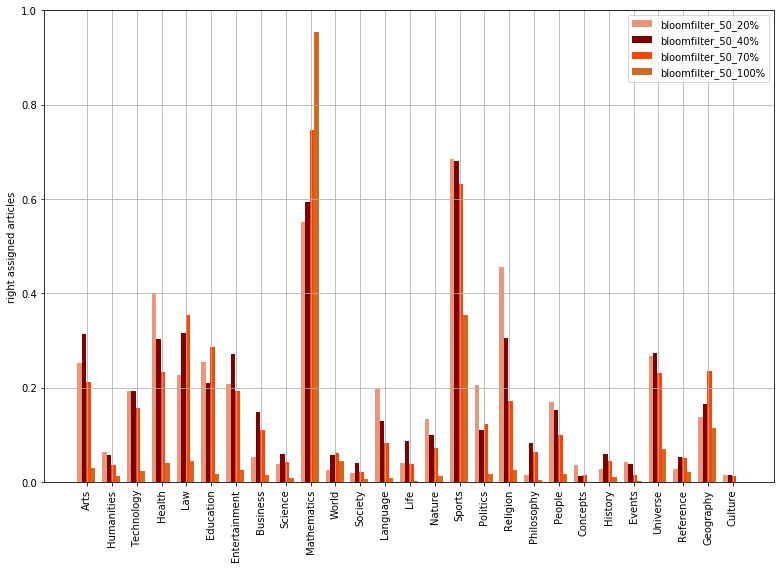

In [32]:
ind = np.arange(len(bf_res01))    # the x locations for the groups
width = 0.18       # the width of the bars

fig, ax = plt.subplots(figsize=(11,11))



p1 = ax.bar(ind-width*1.5,list(bf_res01.values()),width, align='center',color='darksalmon')
p2 = ax.bar(ind-width*0.5,list(bf_res02.values()),width, align='center',color='maroon')
p3 = ax.bar(ind+width*0.5,list(bf_res03.values()),width, align='center',color='orangered')
p4 = ax.bar(ind+width*1.5,list(bf_res04.values()),width, align='center',color='chocolate')
#p5 = ax.bar(ind+width*2.5,list(bf_res05.values()),width, align='center',color='black')




ax.set_xticks(ind + width / 5)
ax.set_xticklabels(list(bf_res01.keys()),rotation='vertical')
ax.legend((p1[0], p2[0], p3[0],p4[0]), ('bloomfilter_50_20%', 'bloomfilter_50_40%','bloomfilter_50_70%','bloomfilter_50_100%'))
ax.set_ylim([0,1])
ax.set_ylabel('right assigned articles')
ax.grid()
plt.tight_layout()
plt.savefig('../TestResults/pics/accuracy_BF_50.png',dpi=500)
plt.show()

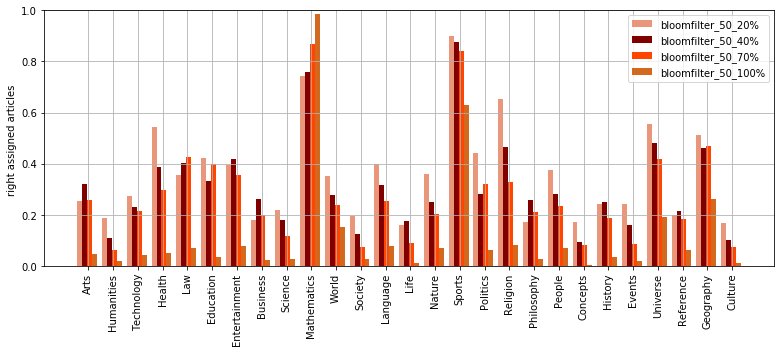

In [9]:
ind = np.arange(len(bf_res01))    # the x locations for the groups
width = 0.2         # the width of the bars

fig, ax = plt.subplots(figsize=(11,5))


p1 = ax.bar(ind-width*1.5,list(bf_Rh_res01.values()),width, align='center',color='darksalmon')
p2 = ax.bar(ind-width*0.5,list(bf_Rh_res02.values()),width, align='center',color='maroon')
p3 = ax.bar(ind+width*0.5,list(bf_Rh_res03.values()),width, align='center',color='orangered')
p4 = ax.bar(ind+width*1.5,list(bf_Rh_res04.values()),width, align='center',color='chocolate')
p4 = ax.bar(ind+width*1.5,list(bf_Rh_res04.values()),width, align='center',color='chocolate')



ax.set_xticks(ind + width / 4)
ax.set_xticklabels(list(bf_Rh_res01.keys()),rotation='vertical')
ax.legend((p1[0], p2[0], p3[0],p4[0]), ('bloomfilter_50_20%', 'bloomfilter_50_40%','bloomfilter_50_70%','bloomfilter_50_100%'))
ax.set_ylim([0,1])
ax.set_ylabel('right assigned articles ')
ax.grid()
plt.tight_layout()
plt.savefig('../TestResults/pics/accuracy_BF_50_range.png',dpi=500)

plt.show()

In [10]:
print(sum([val for key,val in bf_res01.items()])/len([key for key,val in bf_res01.items()]))
print(sum([val for key,val in bf_res02.items()])/len([key for key,val in bf_res02.items()]))
print(sum([val for key,val in bf_res03.items()])/len([key for key,val in bf_res03.items()]))
print(sum([val for key,val in bf_res04.items()])/len([key for key,val in bf_res04.items()]))

0.1752239685264024
0.17844627132532198
0.16067661370727274
0.06893719971456848


In [25]:

res_acc = np.array([[val for key,val in bf_res01.items()],[val for key,val in bf_res02.items()],[val for key,val in bf_res03.items()],[val for key,val in bf_res04.items()]])
print(res_acc.mean(axis=1))     # to take the mean of each col
print(res_acc.std(axis=1))     # to take the std of

list(res_acc.std(axis=1))

[0.17522397 0.17844627 0.16067661 0.0689372 ]
[0.17250742 0.16229242 0.17557303 0.18600783]


[0.17250741912907128,
 0.1622924184943226,
 0.17557303035851002,
 0.18600782767466253]

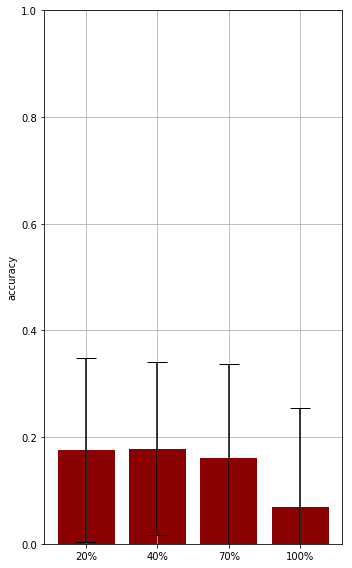

In [31]:
ind = np.arange(4)    # the x locations for the groups
width = 0.2         # the width of the bars

fig, ax = plt.subplots(figsize=(5,11))


p1 = ax.bar(ind,list(res_acc.mean(axis=1)),yerr=list(res_acc.std(axis=1)), align='center',color='darkred',ecolor='black',capsize=10)
#ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)


ax.set_xticks(ind)
ax.set_xticklabels(['20%','40%','70%','100%'],rotation='horizontal')
#ax.legend((p1[0], p2[0], p3[0],p4[0]), ('bloomfilter_50_20%', 'bloomfilter_50_40%','bloomfilter_50_70%','bloomfilter_50_100%'))
ax.set_ylim([0,1])
ax.set_ylabel('accuracy')
ax.grid()
plt.tight_layout()
plt.savefig('../TestResults/pics/hitaccuracy_BF.png',dpi=500)

plt.show()